#### project--->

In [ ]:
#based on features we predict whether the person is survived or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('titanic-training-data.csv')

In [4]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S


In [7]:
df.shape

(891, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df.shape[0]

891

In [12]:
df.shape[1]

12

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Novel, Mr. Mansouer",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<AxesSubplot:xlabel='Survived', ylabel='count'>

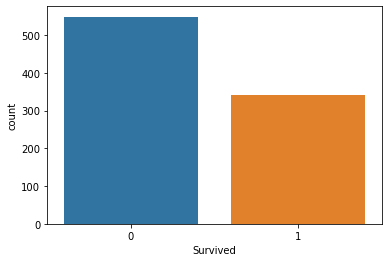

In [16]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

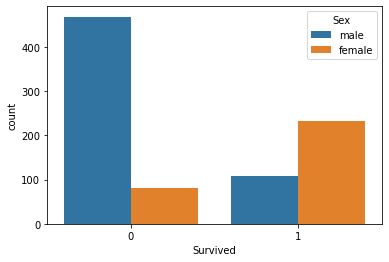

In [18]:
sns.countplot(x='Survived',hue='Sex',data=df)

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

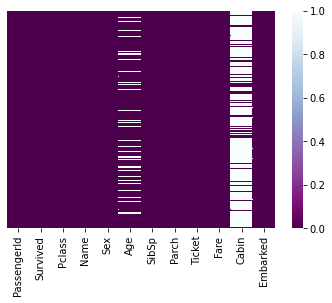

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='BuPu_r')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

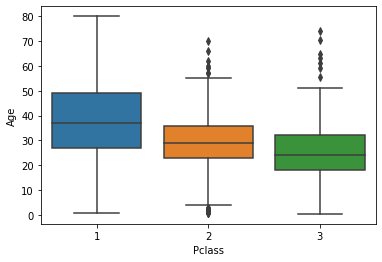

In [24]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [25]:
df.drop('Cabin',axis=1,inplace=True)

In [26]:
df.shape

(891, 11)

In [27]:
df.dropna(inplace=True)

In [28]:
df.shape

(712, 11)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

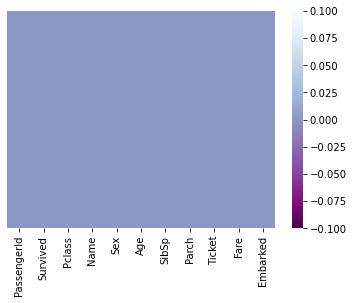

In [30]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='BuPu_r')

In [32]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,S
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,S
811,812,0,3,"Lester, Mr. James",male,39.0,0,0,A/4 48871,24.1500,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,S
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,S
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,Q
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,S
478,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,S
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,S
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,S


In [33]:
Sex=pd.get_dummies(df['Sex'])


In [35]:
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [36]:
Sex=pd.get_dummies(df['Sex'],drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [37]:
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [39]:
pclass=pd.get_dummies(df['Pclass'],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [40]:
df=pd.concat([df,Sex,Embarked,pclass],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [41]:
df.drop(['Sex','Pclass','Name','Embarked','Fare','PassengerId','Ticket'],axis=1,inplace=True)

In [42]:
df.head()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


###Youtube statistics

In [43]:
df1=pd.read_csv('train.csv')

In [45]:
df1.sample(5)

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
1533,VDT95VP?72,24,Penguin Books UK,15889.0,"Interview with Clarice Lispector - São Paulo, ...",Penguin Books UK|books|United Kingdom (Country...,This interview of Clarice Lispector from Febru...,10.0,24,5,,FALSE,FALSE,8458,7945,True,179242,NaN,NaN
1700,TVV11UQc59,1,Goodwillsandusky,33.0,Goodwill Norwalk Store-The Spirit of Giving,NaN,It's the season of giving and at Goodwill givi...,11.0,19,3,36578,TRUE,TRUE,0,0,False,249176,NaN,NaN
1945,JKE98QBp83,17,FightHype.com,253444.0,FLOYD MAYWEATHER KILLS UFC TALK,DENIES DANA WHITE CLAIM: I'M NOT DOING IT,Floyd Mayweather Jr.|Dana White|Boxing|UFC|MMA...,6.0,16,3,30750,TRUE,TRUE,0,0,True,201146,NaN,NaN
1525,AAI34WL=47,10,EllieGouldingVEVO,8110145.0,Ellie Goulding - O Holy Night (Audio),Ellie|Goulding|Holy|Night|Polydor|Pop,Stream/Download: https://ellie.lnk.to/oholynig...,7.0,18,3,238332,TRUE,FALSE,10756,7992,True,2216925,NaN,NaN
1102,DKX94SPT46,1,Screen Junkies,6366779.0,Honest Trailers - The Santa Clause,screenjunkies|screen junkies|honest trailers|h...,WIth the holidays quickly approaching look bac...,9.0,24,6,144688,TRUE,FALSE,18362,13996,True,1753089,NaN,NaN


In [50]:
df1.shape

(3198, 19)

In [49]:
df1.describe(include="all")

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
count,3198,3192,3195,3.175000e+03,3195,3046,3133,3197.000000,3197,3197,3198,3198,3198,3198,3198,3197,3198,1.0,1
unique,3198,17,1501,NaN,3191,2946,3097,NaN,22,10,2174,3,3,2210,2155,2,3194,NaN,1
top,OOS1WKk75,24,The Tonight Show Starring Jimmy Fallon,NaN,Justice League - Movie Review,The Late Show|Stephen Colbert|Colbert|Late Sho...,Jukin Media Verified (Original) * For licensin...,NaN,24,6,,TRUE,FALSE,0,0,True,879028,NaN,False
freq,1,786,34,NaN,2,25,10,NaN,217,475,1015,2182,2354,843,844,2108,2,NaN,1
mean,NaN,NaN,NaN,3.823981e+06,NaN,NaN,NaN,7.964342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2544.0,NaN
std,NaN,NaN,NaN,2.865771e+07,NaN,NaN,NaN,78.556055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2544.0,NaN
25%,NaN,NaN,NaN,2.428800e+05,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2544.0,NaN
50%,NaN,NaN,NaN,1.241220e+06,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2544.0,NaN
75%,NaN,NaN,NaN,3.812622e+06,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2544.0,NaN


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3198 non-null   object 
 1   category_id            3192 non-null   object 
 2   channel_title          3195 non-null   object 
 3   subscriber             3175 non-null   float64
 4   title                  3195 non-null   object 
 5   tags                   3046 non-null   object 
 6   description            3133 non-null   object 
 7   Trend_day_count        3197 non-null   float64
 8   Tag_count              3197 non-null   object 
 9   Trend_tag_count        3197 non-null   object 
 10  comment_count          3198 non-null   object 
 11  comment_disabled       3198 non-null   object 
 12  like dislike disabled  3198 non-null   object 
 13  likes                  3198 non-null   object 
 14  dislike                3198 non-null   object 
 15  tag 

In [52]:
df1.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                 object
Trend_tag_count           object
comment_count             object
comment_disabled          object
like dislike disabled     object
likes                     object
dislike                   object
tag appered in title      object
views                     object
Unnamed: 17              float64
Unnamed: 18               object
dtype: object

In [53]:
df1.isnull().sum()

Video_id                    0
category_id                 6
channel_title               3
subscriber                 23
title                       3
tags                      152
description                65
Trend_day_count             1
Tag_count                   1
Trend_tag_count             1
comment_count               0
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        1
views                       0
Unnamed: 17              3197
Unnamed: 18              3197
dtype: int64

<AxesSubplot:>

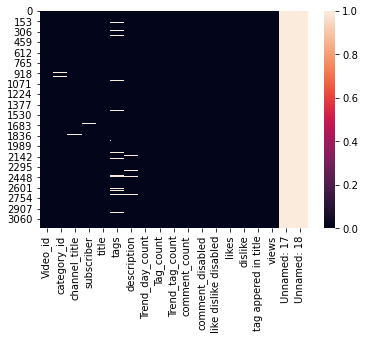

In [54]:
sns.heatmap(df1.isnull())

In [72]:
df1.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978,NaN,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,NaN,NaN
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102,NaN,NaN
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302,NaN,NaN
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374,NaN,NaN


In [78]:
df1.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,The Late Show|Stephen Colbert|Colbert|Late Sho...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978,NaN,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,The Late Show|Stephen Colbert|Colbert|Late Sho...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,NaN,NaN
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",The Late Show|Stephen Colbert|Colbert|Late Sho...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102,NaN,NaN
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,The Late Show|Stephen Colbert|Colbert|Late Sho...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302,NaN,NaN
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,The Late Show|Stephen Colbert|Colbert|Late Sho...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374,NaN,NaN


In [79]:
mediansubscribers=df1['subscriber'].median()

In [2]:
df1['subscriber'].replace(np.nan,mediansubscribers,inplace=True)
df1.head(2)

NameError: name 'df1' is not defined

In [83]:
df1.isnull().sum()

Video_id                    0
category_id                 6
channel_title               3
subscriber                  0
title                       3
tags                        0
description                65
Trend_day_count             1
Tag_count                   1
Trend_tag_count             1
comment_count               0
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        1
views                       0
Unnamed: 17              3197
Unnamed: 18              3197
dtype: int64

In [84]:
df1.drop(['Unnamed: 17','Unnamed: 18'],axis=1,inplace=True)

In [85]:
df1.shape

(3198, 17)

In [87]:
trend_day_count=df1['Trend_day_count'].median()

In [88]:
df1['Trend_day_count'].replace(np.nan,trend_day_count,inplace=True)

In [89]:
df1.isnull().sum()

Video_id                  0
category_id               6
channel_title             3
subscriber                0
title                     3
tags                      0
description              65
Trend_day_count           0
Tag_count                 1
Trend_tag_count           1
comment_count             0
comment_disabled          0
like dislike disabled     0
likes                     0
dislike                   0
tag appered in title      1
views                     0
dtype: int64

In [90]:
df1.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                 object
Trend_tag_count           object
comment_count             object
comment_disabled          object
like dislike disabled     object
likes                     object
dislike                   object
tag appered in title      object
views                     object
dtype: object

In [91]:
des=df1['description'].mode().values[0]

In [92]:
df1['description']=df1['description'].replace(np.nan,des)

In [93]:
df1.isnull().sum()

Video_id                 0
category_id              6
channel_title            3
subscriber               0
title                    3
tags                     0
description              0
Trend_day_count          0
Tag_count                1
Trend_tag_count          1
comment_count            0
comment_disabled         0
like dislike disabled    0
likes                    0
dislike                  0
tag appered in title     1
views                    0
dtype: int64

In [94]:
chtitle=df1['channel_title'].mode().values[0]
df1['channel_title']=df1['channel_title'].replace(np.nan,chtitle)

In [96]:
cid=df1['category_id'].mode().values[0]
df1['category_id']=df1['category_id'].replace(np.nan,cid)

In [98]:
valu=df1['title'].mode().values[0]
df1['title']=df1['title'].replace(np.nan,valu)

In [99]:
df1.isnull().sum()

Video_id                 0
category_id              0
channel_title            0
subscriber               0
title                    0
tags                     0
description              0
Trend_day_count          0
Tag_count                1
Trend_tag_count          1
comment_count            0
comment_disabled         0
like dislike disabled    0
likes                    0
dislike                  0
tag appered in title     1
views                    0
dtype: int64